#part 1:

Streaming output truncated to the last 5000 lines.
Iteration 10001!
Iteration 10002!
Iteration 10003!
Iteration 10004!
Iteration 10005!
Iteration 10006!
Iteration 10007!
Iteration 10008!
Iteration 10009!
Iteration 10010!
Iteration 10011!
Iteration 10012!
Iteration 10013!
Iteration 10014!
Iteration 10015!
Iteration 10016!
Iteration 10017!
Iteration 10018!
Iteration 10019!
Iteration 10020!
Iteration 10021!
Iteration 10022!
Iteration 10023!
Iteration 10024!
Iteration 10025!
Iteration 10026!
Iteration 10027!
Iteration 10028!
Iteration 10029!
Iteration 10030!
Iteration 10031!
Iteration 10032!
Iteration 10033!
Iteration 10034!
Iteration 10035!
Iteration 10036!
Iteration 10037!
Iteration 10038!
Iteration 10039!
Iteration 10040!
Iteration 10041!
Iteration 10042!
Iteration 10043!
Iteration 10044!
Iteration 10045!
Iteration 10046!
Iteration 10047!
Iteration 10048!
Iteration 10049!
Iteration 10050!
Iteration 10051!
Iteration 10052!
Iteration 10053!
Iteration 10054!
Iteration 10055!
Iteration 1005

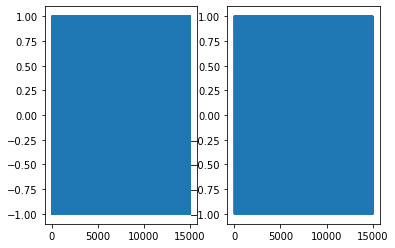

In [7]:
import numpy as np
from math import inf as infinity
import itertools
import random
import time
import matplotlib.pyplot as plt


game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
players = ['X','O']

def play_move(state, player, block_num):
    if state[int((block_num-1)/3)][(block_num-1)%3] is ' ':
        state[int((block_num-1)/3)][(block_num-1)%3] = player
    else:
        block_num = int(input("Block is not empty, ya blockhead! Choose again: "))
        play_move(state, player, block_num)
    
def copy_game_state(state):
    new_state = [[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']]
    for i in range(3):
        for j in range(3):
            new_state[i][j] = state[i][j]
    return new_state
    
def check_current_state(game_state):    
    # Check horizontals
    if (game_state[0][0] == game_state[0][1] and game_state[0][1] == game_state[0][2] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[1][0] == game_state[1][1] and game_state[1][1] == game_state[1][2] and game_state[1][0] is not ' '):
        return game_state[1][0], "Done"
    if (game_state[2][0] == game_state[2][1] and game_state[2][1] == game_state[2][2] and game_state[2][0] is not ' '):
        return game_state[2][0], "Done"
    
    # Check verticals
    if (game_state[0][0] == game_state[1][0] and game_state[1][0] == game_state[2][0] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[0][1] == game_state[1][1] and game_state[1][1] == game_state[2][1] and game_state[0][1] is not ' '):
        return game_state[0][1], "Done"
    if (game_state[0][2] == game_state[1][2] and game_state[1][2] == game_state[2][2] and game_state[0][2] is not ' '):
        return game_state[0][2], "Done"
    
    # Check diagonals
    if (game_state[0][0] == game_state[1][1] and game_state[1][1] == game_state[2][2] and game_state[0][0] is not ' '):
        return game_state[1][1], "Done"
    if (game_state[2][0] == game_state[1][1] and game_state[1][1] == game_state[0][2] and game_state[2][0] is not ' '):
        return game_state[1][1], "Done"
    
    # Check if draw
    draw_flag = 0
    for i in range(3):
        for j in range(3):
            if game_state[i][j] is ' ':
                draw_flag = 1
    if draw_flag is 0:
        return None, "Draw"
    
    return None, "Not Done"

def print_board(game_state):
    print('----------------')
    print('| ' + str(game_state[0][0]) + ' || ' + str(game_state[0][1]) + ' || ' + str(game_state[0][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[1][0]) + ' || ' + str(game_state[1][1]) + ' || ' + str(game_state[1][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[2][0]) + ' || ' + str(game_state[2][1]) + ' || ' + str(game_state[2][2]) + ' |')
    print('----------------')
    
  
# Initialize state values
player = ['X','O',' ']
states_dict = {}
all_possible_states = [[list(i[0:3]),list(i[3:6]),list(i[6:10])] for i in itertools.product(player, repeat = 9)]
n_states = len(all_possible_states) # 2 players, 9 spaces
n_actions = 9   # 9 spaces
state_values_for_AI_O = np.full((n_states),0.0)
state_values_for_AI_X = np.full((n_states),0.0)
# print("n_states = %i \nn_actions = %i"%(n_states, n_actions))

# State values for AI 'O'
for i in range(n_states):
    states_dict[i] = all_possible_states[i]
    winner, _ = check_current_state(states_dict[i])
    if winner == 'O':   # AI won
        state_values_for_AI_O[i] = 1
    elif winner == 'X':   # AI lost
        state_values_for_AI_O[i] = -1
        
# State values for AI 'X'       
for i in range(n_states):
    winner, _ = check_current_state(states_dict[i])
    if winner == 'O':   # AI lost
        state_values_for_AI_X[i] = -1
    elif winner == 'X':   # AI won
        state_values_for_AI_X[i] = 1

def update_state_value_O(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI_O[curr_state_idx] + learning_rate*(state_values_for_AI_O[next_state_idx]  - state_values_for_AI_O[curr_state_idx])
    state_values_for_AI_O[curr_state_idx] = new_value
    
def update_state_value_X(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI_X[curr_state_idx] + learning_rate*(state_values_for_AI_X[next_state_idx]  - state_values_for_AI_X[curr_state_idx])
    state_values_for_AI_X[curr_state_idx] = new_value

def getBestMove(state, player, epsilon):
    '''
    Reinforcement Learning Algorithm
    '''    
    moves = []
    curr_state_values = []
    empty_cells = []
    for i in range(3):
        for j in range(3):
            if state[i][j] is ' ':
                empty_cells.append(i*3 + (j+1))
    
    for empty_cell in empty_cells:
        moves.append(empty_cell)
        new_state = copy_game_state(state)
        play_move(new_state, player, empty_cell)
        next_state_idx = list(states_dict.keys())[list(states_dict.values()).index(new_state)]
        if player == 'X':
            curr_state_values.append(state_values_for_AI_X[next_state_idx])
        else:
            curr_state_values.append(state_values_for_AI_O[next_state_idx])
        
    # print('Possible moves = ' + str(moves))
    # print('Move values = ' + str(curr_state_values))    
    best_move_idx = np.argmax(curr_state_values)
    
    if np.random.uniform(0,1) <= epsilon:       # Exploration
        best_move = random.choice(empty_cells)
        # print('Agent decides to explore! Takes action = ' + str(best_move))
        epsilon *= 0.99
    else:   #Exploitation
        best_move = moves[best_move_idx]
        # print('Agent decides to exploit! Takes action = ' + str(best_move))
    return best_move

# PLaying

#LOAD TRAINED STATE VALUES
#state_values_for_AI_X = np.loadtxt('trained_state_values_X.txt', dtype=np.float64)
#state_values_for_AI_O = np.loadtxt('trained_state_values_O.txt', dtype=np.float64)

learning_rate = 0.2
epsilon = 0.2
num_iterations = 15000
X_rewards = np.zeros(num_iterations)
O_rewards = np.zeros(num_iterations)
for iteration in range(num_iterations):
    game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
    current_state = "Not Done"
    print("Iteration " + str(iteration) + "!")
    # print_board(game_state)
    winner = None
    current_player_idx = random.choice([0,1])
        
    while current_state == "Not Done":
        curr_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
        if current_player_idx == 0:     # AI_X's turn
            # print("\nAI X's turn!")         
            block_choice = getBestMove(game_state, players[current_player_idx], epsilon)
            play_move(game_state ,players[current_player_idx], block_choice)
            new_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
            
        else:       # AI_O's turn
            # print("\nAI O's turn!")   
            block_choice = getBestMove(game_state, players[current_player_idx], epsilon)
            play_move(game_state ,players[current_player_idx], block_choice)
            new_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
        
        # print_board(game_state)
        #print('State value = ' + str(state_values_for_AI[new_state_idx]))
        update_state_value_O(curr_state_idx, new_state_idx, learning_rate)
        update_state_value_X(curr_state_idx, new_state_idx, learning_rate)
        winner, current_state = check_current_state(game_state)
        if winner is not None:
            # print(str(winner) + " won!")
            pass
        else:
            current_player_idx = (current_player_idx + 1)%2
        
        if current_state is "Draw":
            # print("Draw!")
            pass
    if winner is not None:
    #print_board(game_state)
      if winner=='X':
          X_rewards[iteration]=1
          O_rewards[iteration]=-1
      elif winner=='O':
          X_rewards[iteration]=-1
          O_rewards[iteration]=1
    else:
        X_rewards[iteration]=0
        O_rewards[iteration]=0        #time.sleep(1)
print('Training Complete!')    

fig, axs = plt.subplots(1, 2)
axs[0].plot(O_rewards)
axs[1].plot(X_rewards)
plt.show()
# Save state values for future use
#np.savetxt('trained_state_values_X.txt', state_values_for_AI_X, fmt = '%.6f')
#np.savetxt('trained_state_values_O.txt', state_values_for_AI_O, fmt = '%.6f')


#part 2

Streaming output truncated to the last 5000 lines.
Iteration 10001!
Iteration 10002!
Iteration 10003!
Iteration 10004!
Iteration 10005!
Iteration 10006!
Iteration 10007!
Iteration 10008!
Iteration 10009!
Iteration 10010!
Iteration 10011!
Iteration 10012!
Iteration 10013!
Iteration 10014!
Iteration 10015!
Iteration 10016!
Iteration 10017!
Iteration 10018!
Iteration 10019!
Iteration 10020!
Iteration 10021!
Iteration 10022!
Iteration 10023!
Iteration 10024!
Iteration 10025!
Iteration 10026!
Iteration 10027!
Iteration 10028!
Iteration 10029!
Iteration 10030!
Iteration 10031!
Iteration 10032!
Iteration 10033!
Iteration 10034!
Iteration 10035!
Iteration 10036!
Iteration 10037!
Iteration 10038!
Iteration 10039!
Iteration 10040!
Iteration 10041!
Iteration 10042!
Iteration 10043!
Iteration 10044!
Iteration 10045!
Iteration 10046!
Iteration 10047!
Iteration 10048!
Iteration 10049!
Iteration 10050!
Iteration 10051!
Iteration 10052!
Iteration 10053!
Iteration 10054!
Iteration 10055!
Iteration 1005

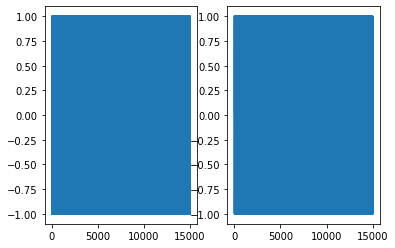

In [8]:
import numpy as np
from math import inf as infinity
import itertools
import random
import time
import matplotlib.pyplot as plt


game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
players = ['X','O']

def play_move(state, player, block_num):
    if state[int((block_num-1)/3)][(block_num-1)%3] is ' ':
        state[int((block_num-1)/3)][(block_num-1)%3] = player
    else:
        block_num = int(input("Block is not empty, ya blockhead! Choose again: "))
        play_move(state, player, block_num)
    
def copy_game_state(state):
    new_state = [[' ',' ',' '],[' ',' ',' '],[' ',' ',' ']]
    for i in range(3):
        for j in range(3):
            new_state[i][j] = state[i][j]
    return new_state
    
def check_current_state(game_state):    
    # Check horizontals
    if (game_state[0][0] == game_state[0][1] and game_state[0][1] == game_state[0][2] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[1][0] == game_state[1][1] and game_state[1][1] == game_state[1][2] and game_state[1][0] is not ' '):
        return game_state[1][0], "Done"
    if (game_state[2][0] == game_state[2][1] and game_state[2][1] == game_state[2][2] and game_state[2][0] is not ' '):
        return game_state[2][0], "Done"
    
    # Check verticals
    if (game_state[0][0] == game_state[1][0] and game_state[1][0] == game_state[2][0] and game_state[0][0] is not ' '):
        return game_state[0][0], "Done"
    if (game_state[0][1] == game_state[1][1] and game_state[1][1] == game_state[2][1] and game_state[0][1] is not ' '):
        return game_state[0][1], "Done"
    if (game_state[0][2] == game_state[1][2] and game_state[1][2] == game_state[2][2] and game_state[0][2] is not ' '):
        return game_state[0][2], "Done"
    
    # Check diagonals
    if (game_state[0][0] == game_state[1][1] and game_state[1][1] == game_state[2][2] and game_state[0][0] is not ' '):
        return game_state[1][1], "Done"
    if (game_state[2][0] == game_state[1][1] and game_state[1][1] == game_state[0][2] and game_state[2][0] is not ' '):
        return game_state[1][1], "Done"
    
    # Check if draw
    draw_flag = 0
    for i in range(3):
        for j in range(3):
            if game_state[i][j] is ' ':
                draw_flag = 1
    if draw_flag is 0:
        return None, "Draw"
    
    return None, "Not Done"

def print_board(game_state):
    print('----------------')
    print('| ' + str(game_state[0][0]) + ' || ' + str(game_state[0][1]) + ' || ' + str(game_state[0][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[1][0]) + ' || ' + str(game_state[1][1]) + ' || ' + str(game_state[1][2]) + ' |')
    print('----------------')
    print('| ' + str(game_state[2][0]) + ' || ' + str(game_state[2][1]) + ' || ' + str(game_state[2][2]) + ' |')
    print('----------------')
    
  
# Initialize state values
player = ['X','O',' ']
states_dict = {}
all_possible_states = [[list(i[0:3]),list(i[3:6]),list(i[6:10])] for i in itertools.product(player, repeat = 9)]
n_states = len(all_possible_states) # 2 players, 9 spaces
n_actions = 9   # 9 spaces
state_values_for_AI_O = np.full((n_states),0.0)
state_values_for_AI_X = np.full((n_states),0.0)
# print("n_states = %i \nn_actions = %i"%(n_states, n_actions))

def rotate(state):
    rotate_180 = [ state[2], state[1], state[0] ]
    rotate_90_clockwise = [ [state[2][0],state[1][0],state[0][0]] , [state[2][1],state[1][1],state[0][1]] , [state[2][2], state[1][2],state[0][2]] ]
    rotate_90_counterclockwise = [ [state[0][2],state[1][2],state[2][2]] , [state[0][1],state[1][1],state[2][1]] , [state[0][0],state[1][0],state[2][0]] ]
    return state, rotate_90_clockwise, rotate_90_counterclockwise, rotate_180

def get_state_inx(game_state):
    rotate_0, rotate_90_clockwise, rotate_90_counterclockwise, rotate_180 = rotate(game_state)
    try:
        idx = list(states_dict.values()).index(rotate_0)
    except:
        try:
            idx = list(states_dict.values()).index(rotate_180)
        except:
            try:
                idx= list(states_dict.values()).index(rotate_90_counterclockwise)
            except:
                try:
                    idx =list(states_dict.values()).index(rotate_90_clockwise)
                except:
                    pass
    return idx

# State values for AI 'O'
for i in range(n_states):
    rotate_0, rotate_90_clockwise, rotate_90_counterclockwise, rotate_180 = rotate(all_possible_states[i])
    try:
        list(states_dict.values()).index(rotate_0)
    except:
        try:
            list(states_dict.values()).index(rotate_180)
        except:
            try:
                list(states_dict.values()).index(rotate_90_counterclockwise)
            except:
                try:
                    list(states_dict.values()).index(rotate_90_clockwise)
                except:
                    states_dict[i] = all_possible_states[i]
                    winner, _ = check_current_state(states_dict[i])
                    if winner == 'O':   # AI won
                        state_values_for_AI_O[i] = 1
                        state_values_for_AI_X[i] = -1
                    elif winner == 'X':   # AI lost
                        state_values_for_AI_O[i] = -1
                        state_values_for_AI_X[i] = 1

                       
  
def update_state_value_O(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI_O[curr_state_idx] + learning_rate*(state_values_for_AI_O[next_state_idx]  - state_values_for_AI_O[curr_state_idx])
    state_values_for_AI_O[curr_state_idx] = new_value
    
def update_state_value_X(curr_state_idx, next_state_idx, learning_rate):
    new_value = state_values_for_AI_X[curr_state_idx] + learning_rate*(state_values_for_AI_X[next_state_idx]  - state_values_for_AI_X[curr_state_idx])
    state_values_for_AI_X[curr_state_idx] = new_value

def getBestMove(state, player, epsilon):
    '''
    Reinforcement Learning Algorithm
    '''    
    moves = []
    curr_state_values = []
    empty_cells = []
    for i in range(3):
        for j in range(3):
            if state[i][j] is ' ':
                empty_cells.append(i*3 + (j+1))
    
    for empty_cell in empty_cells:
        moves.append(empty_cell)
        new_state = copy_game_state(state)
        play_move(new_state, player, empty_cell)
        next_state_idx = get_state_inx(new_state)
        if player == 'X':
            curr_state_values.append(state_values_for_AI_X[next_state_idx])
        else:
            curr_state_values.append(state_values_for_AI_O[next_state_idx])
        
    # print('Possible moves = ' + str(moves))
    # print('Move values = ' + str(curr_state_values))    
    best_move_idx = np.argmax(curr_state_values)
    
    if np.random.uniform(0,1) <= epsilon:       # Exploration
        best_move = random.choice(empty_cells)
        # print('Agent decides to explore! Takes action = ' + str(best_move))
        epsilon *= 0.99
    else:   #Exploitation
        best_move = moves[best_move_idx]
        # print('Agent decides to exploit! Takes action = ' + str(best_move))
    return best_move

# PLaying

#LOAD TRAINED STATE VALUES
# state_values_for_AI_X = np.loadtxt('trained_state_values_X.txt', dtype=np.float64)
# state_values_for_AI_O = np.loadtxt('trained_state_values_O.txt', dtype=np.float64)


learning_rate = 0.2
epsilon = 0.2
num_iterations = 15000
X_rewards = np.zeros(num_iterations)
O_rewards = np.zeros(num_iterations)
for iteration in range(num_iterations):
    game_state = [[' ',' ',' '],
              [' ',' ',' '],
              [' ',' ',' ']]
    current_state = "Not Done"
    print("Iteration " + str(iteration) + "!")
    # print_board(game_state)
    winner = None
    current_player_idx = random.choice([0,1])
        
    while current_state == "Not Done":
        # curr_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
        curr_state_idx = get_state_inx(game_state)
        if current_player_idx == 0:     # AI_X's turn
            # print("\nAI X's turn!")         
            block_choice = getBestMove(game_state, players[current_player_idx], epsilon)
            play_move(game_state ,players[current_player_idx], block_choice)
            #new_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
            new_state_idx = get_state_inx(game_state)
        else:       # AI_O's turn
            # print("\nAI O's turn!")   
            block_choice = getBestMove(game_state, players[current_player_idx], epsilon)
            play_move(game_state ,players[current_player_idx], block_choice)
            #new_state_idx = list(states_dict.keys())[list(states_dict.values()).index(game_state)]
            new_state_idx = get_state_inx(game_state)
        # print_board(game_state)
        #print('State value = ' + str(state_values_for_AI[new_state_idx]))
        update_state_value_O(curr_state_idx, new_state_idx, learning_rate)
        update_state_value_X(curr_state_idx, new_state_idx, learning_rate)
        winner, current_state = check_current_state(game_state)
        if winner is not None:
            pass
        else:
            current_player_idx = (current_player_idx + 1)%2
        
        if current_state is "Draw":
            # print("Draw!")
            pass
    if winner is not None:
        #print_board(game_state)
        if winner=='X':
            X_rewards[iteration]=1
            O_rewards[iteration]=-1
        elif winner=='O':
            X_rewards[iteration]=-1
            O_rewards[iteration]=1
    else:
        X_rewards[iteration]=0
        O_rewards[iteration]=0
        
        #time.sleep(1)
print('Training Complete!')    

fig, axs = plt.subplots(1, 2)
axs[0].plot(O_rewards)
axs[1].plot(X_rewards)
plt.show()

# Save state values for future use
#np.savetxt('trained_state_values_X.txt', state_values_for_AI_X, fmt = '%.6f')
#np.savetxt('trained_state_values_O.txt', state_values_for_AI_O, fmt = '%.6f')

#part 3